In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load and process dataset
load breast_cancer.csv, drop columns "id" and "Unnamed: 32", investigate the dataset, and divide into train and test with 80/20 ratio, map values of "diagnosis" from ("B","M") to (0,1)

In [394]:
df= pd.read_csv('breast_cancer.csv')
df=df.drop(['id','Unnamed: 32'], axis=1)
#print(df.isnull().sum())

df


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [219]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [395]:
def transvorm (z):
    for i in range (len (z)):
        if z[i]=='B':
            z[i]=0
        else:
            z[i]=1
    return z

#df['diagnosis']=transvorm(df['diagnosis'])
target_col = 'diagnosis'
df.loc[df[target_col] == 'B', 'diagnosis'] = 0
df.loc[df[target_col] == 'M', 'diagnosis'] = 1
df[target_col] = df[target_col].astype(int)

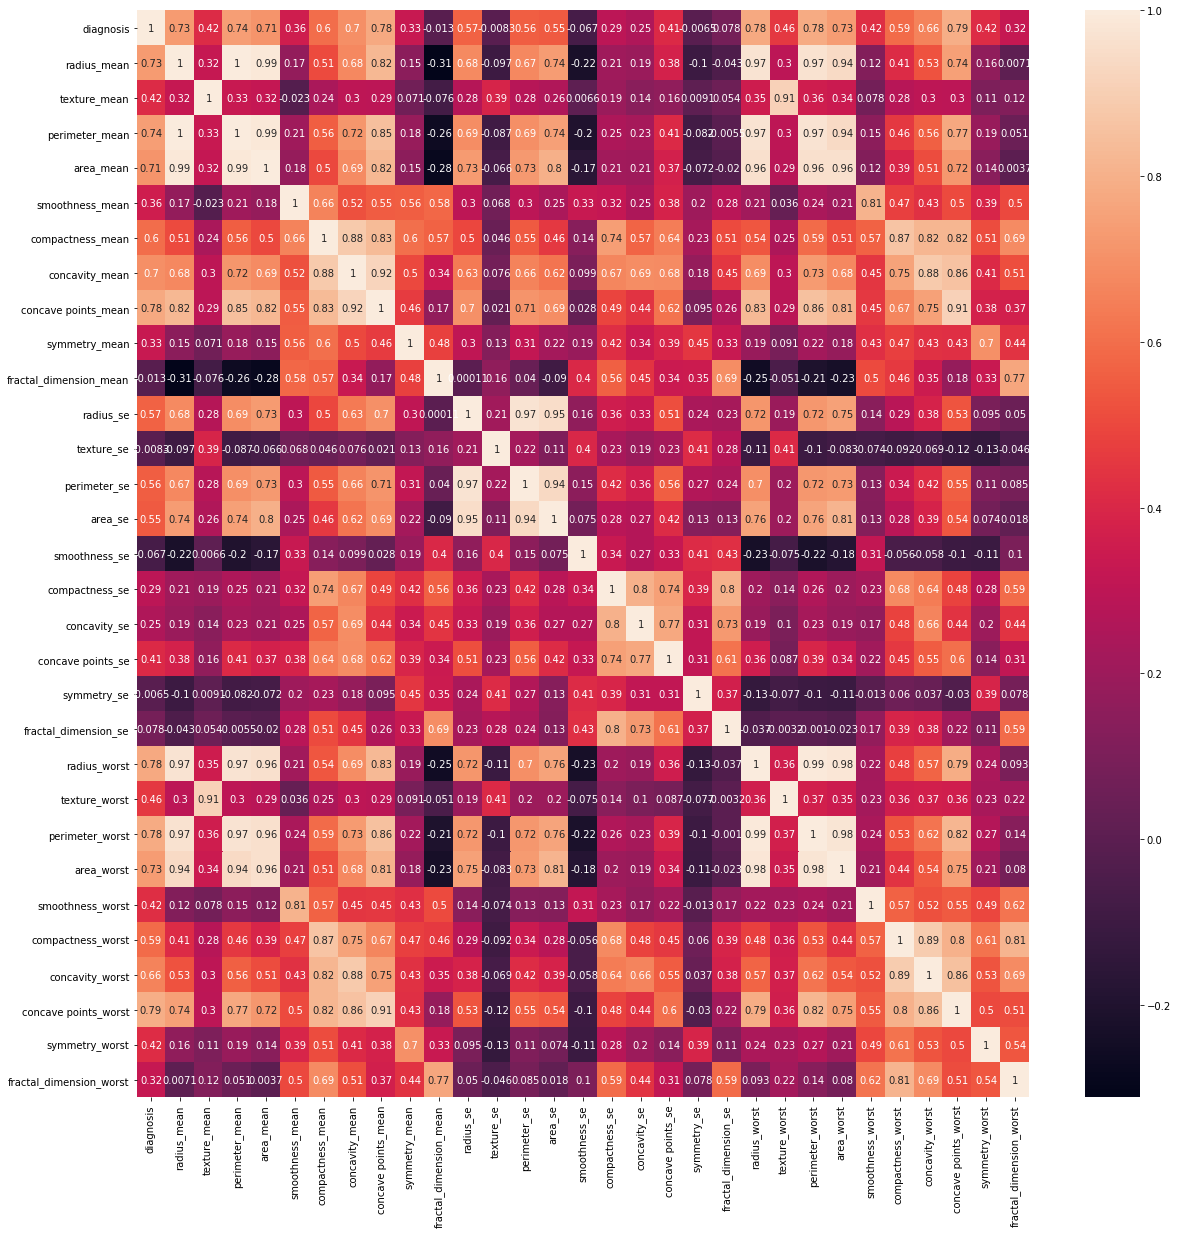

In [702]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(),annot=True)

In [602]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[df.columns.difference(['diagnosis'])],df['diagnosis'], test_size=0.2)


In [603]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xTrain=scaler.fit_transform(xTrain)
xTest=scaler.transform(xTest)


## Implementing KMeans

In [604]:
class My_KMeans(object):
    def __init__(self, K, metric='L2', max_iter=200, eps=1e-4):
        self.K=K
        self.max_iter=max_iter
        self.eps=eps
        self.cluster_centers=np.array([])


        if metric=='L2':
            self.dist= lambda x,y: np.linalg.norm(x-y,2)
        elif metric=='L1':
            self.dist= lambda x,y: np.linalg.norm(x-y,1)
        else:
            raise NotImplementedError
        
        """
        TODO:
        if metric is 'L2' let self.dist be a function that computes euclidian distance between x and y vectors,
        if metric is 'L1' let self.dist be a function that computes manhattan distance between x and y vectors,
        otherwise raise not implemented error
        """
        
    def distortion(self, X, r):
        """
        param X: numpy array of shape (M,N)
        param r: numpy array of shape (M), shows to which cluster each row of X belongs
        return: distortion value of the dataset
        """
        #TODO calculate distortion measure using X and self.cluster_centers
        sum_ = 0
        for i in range(self.K):
            Sum += np.sum(self.dist(X[np.where(r==1)], self.centroids[k]))
        
        return Sum
    
        
    def init_centroids(self, X, centers_init):
        """
        :param X: numpy array of shape (M,N)
        :param centers_init: numpy array of shape (K,N)
        """
        
        if centers_init== 'random':
            self.cluster_centers=X[np.random.choice(X.shape[0],self.K, replace=False),:] 
        elif  centers_init== 'kmeans++':
            self.cluster_centers=X[np.random.choice(X.shape[0],1, replace=False),:]
            while self.cluster_centers.shape[0]<self.K:
                d_x=[]
                for x in range(X.shape[0]):
                    distx=[]
                    for i in range(self.cluster_centers.shape[0]):
                        distx.append(self.dist(X[x], self.cluster_centers[i]))
                    d_x.append(min(distx))
                p=[]
                for i in range(X.shape[0]):
                    p.append(d_x[i]/sum(d_x))

                self.cluster_centers = np.vstack([self.cluster_centers, X[np.random.choice(X.shape[0],1,replace=False,p=p),:]])
                
        else: 
            raise NotImplementedError 
                    
        return self.cluster_centers         
            
            
        """TODO: 
        If centers_init is 'random' initialize self.cluster_centers with random K items from X,
        if it is 'kmeans++' initialize centroids according to the algorithm in 
        http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf page 3,
        otherwise raise not implemented error .
        """
       
        
    def fit(self, X, centers_init='random'):
        """
        :param X: numpy array of shape (M,N)
        :param centers_init: numpy array of shape (K,N)
        """
        """TODO: 
        1. Initialize cluster centers using self.init_centroids method
        2. Implement KMeans algorithm and  terminate it when either self.max_iter iterations are performed,
        or the biggest change in cluster centers is smaller than self.eps
        
        The final cluster centers should be saved in self.cluster_centers
        """
        self.cluster_centers=self.init_centroids(X,centers_init)
        old_cluster_centers=self.cluster_centers.copy()

        while self.max_iter!=0:
            pred=[]
                    
            for x in range(X.shape[0]):
                distx=[]
                for i in range((self.cluster_centers).shape[0]):
                    distx.append(self.dist(X[x],self.cluster_centers[i]))
                
                pred.append(distx.index(min(distx)))
            for l in range(self.K):
                self.cluster_centers[l]=np.mean(X[[i for i in range(len(pred)) if pred[i]==l]], axis=0)
            max_=(np.max([self.dist(old_cluster_centers[s],self.cluster_centers[s]) for s in range(self.K)]))
            if max_< self.eps:
                self.max_iter=0
               
            else:
                self.max_iter=self.max_iter-1
                old_cluster_centers=self.cluster_centers.copy()


    def predict(self, X):
        """
        :param X: numpy array of shape (M,N)
        :return: numpy array of shape (M,)
        """
        """TODO:
        using  self.cluster_centers predict to which cluster each datapoint of X belongs, values in returned array
        are integers(id of the cluster). 
        """

        pred=[]
        for x in range(X.shape[0]):
            dist=[]
            for i in range(self.cluster_centers.shape[0]):
                dist.append(self.dist(X[x], self.cluster_centers[i]))
            pred.append(dist.index(min(dist)))
        return np.array(pred)

    
    

## Cluster the dataset with kmeans, model and predict malignancy of tumors in the test set entries
## 1. Perform clustering using the following hyperparameter pairs
1. metric='L1', center_init='random'
2. metric='L1', center_init='kmeans++'
3. metric='L2', center_init='random'
4. metric='L2', center_init='kmeans++'

## 2. Predict malignancy of tumors in the test set entries using all 4 models trained above, compare their performances.


In [606]:
kmean1 = My_KMeans(K=2, metric='L1')
kmean2 = My_KMeans(K=2, metric='L1')
kmean3 = My_KMeans(K=2, metric='L2')
kmean4 = My_KMeans(K=2, metric='L2')

In [607]:
from sklearn.metrics import accuracy_score
from scipy.stats import mode
kmean1.fit(xTrain, centers_init='random')
pred = kmean1.predict(xTest)

labels = np.zeros_like(pred)
for i in range(2):
    mask = (pred== i)
    labels[mask] = mode(yTest[mask])[0]
print(f'accuracy_score: ', accuracy_score(yTest, labels))

accuracy_score:  0.9035087719298246


In [608]:
kmean3.fit(xTrain, centers_init='random')
pred = kmean3.predict(xTest)

labels = np.zeros_like(pred)
for i in range(2):
    mask = (pred== i)
    labels[mask] = mode(yTest[mask])[0]
print(f'accuracy_score: ', accuracy_score(yTest, labels))

accuracy_score:  0.8771929824561403


In [610]:
from sklearn.metrics import accuracy_score
from scipy.stats import mode
kmean2.fit(xTrain, centers_init='kmeans++')
pred = kmean2.predict(xTest)

labels = np.zeros_like(pred)
for i in range(2):
    mask = (pred== i)
    labels[mask] = mode(yTest[mask])[0]
print(f'accuracy_score: ', accuracy_score(yTest, labels))

accuracy_score:  0.8508771929824561


In [622]:
from sklearn.metrics import accuracy_score
from scipy.stats import mode
kmean4.fit(xTrain, centers_init='kmeans++')
pred = kmean4.predict(xTest)

labels = np.zeros_like(pred)
for i in range(2):
    mask = (pred== i)
    labels[mask] = mode(yTest[mask])[0]
print(f'accuracy_score: ', accuracy_score(yTest, labels))

accuracy_score:  0.868421052631579


## Fit your implementation of Logistic Regression on the dataset, predict on test set and compare the results with kmeans approach

In [630]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xTrain, yTrain)
logreg_y_pred = logreg.predict(xTest)
print('accuracy_score: ', accuracy_score(yTest, logreg_y_pred ))

accuracy_score:  0.9736842105263158


## Analyze the coefficients of fitted logistic regression model, drop 2 most unimportant features and train again Logistic regression and Kmeans with best metric, center_init hyperparameters, evaluate and compare results

In [668]:
logreg.coef_
sortedval=np.sort(np.abs(logreg.coef_))
absval=np.abs(logreg.coef_)
a=np.argwhere(absval==sortedval[0][0])[0][1]
b=np.argwhere(absval==sortedval[0][1])[0][1]
xTrain1=np.delete(xTrain,[a, b], axis=1)
xTest1=np.delete(xTest,[a, b], axis=1)


In [669]:
logreg.fit(xTrain1, yTrain)
logreg_y_pred1 = logreg.predict(xTest1)
print('accuracy_score: ', accuracy_score(yTest, logreg_y_pred1 ))

accuracy_score:  0.9824561403508771


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [633]:
print('Accuracy of Sklearn Logistic Regression: ', accuracy_score(yTest, logreg_y_pred))
print('Accuracy of Sklearn Logistic Regression with dropped 2 unimportant features: ', accuracy_score(yTest, logreg_y_pred1))
print(f'Accuracy of my KMeans: ', accuracy_score(yTest, labels))

Accuracy of Sklearn Logistic Regression:  0.9736842105263158
Accuracy of Sklearn Logistic Regression with dropped 2 unimportant features:  0.9736842105263158
Accuracy of my KMeans:  0.868421052631579


## Analyze the coefficients of fitted initial logistic regression model(using all features), select two most important features and train again Logistic regression and Kmeans with best metric, center_init hyperparameters, evaluate and compare results, make the following plot using the test set:

datapoints with cluster centers and decision boundary, color the datapoints according to Kmeans predictions
color the datapoints on which predictions of logistic regression and Kmeans disagree with separate color


In [688]:
n_iterations=55

eps=0.00001
for iteration in [100,1000,55,]:
    logreg = LogisticRegression(max_iter=iteration)
    logreg.fit(xTrain, yTrain)
    logreg_y_pred = logreg.predict(xTest)
    as_=accuracy_score(yTest, logreg_y_pred )
    print(as_)

0.9736842105263158
0.9736842105263158
0.9736842105263158


In [690]:
logreg.coef_
sortedval=np.sort(np.abs(logreg.coef_))
absval=np.abs(logreg.coef_)
a=np.argwhere(absval==sortedval[0][-1])[0][1]
b=np.argwhere(absval==sortedval[0][-2])[0][1]
xTrain2=xTrain[:,[a, b]]
xTest2=xTest[:,[a, b]]


In [691]:
logreg.fit(xTrain2, yTrain)
logreg_y_pred2 = logreg.predict(xTest2)
print('accuracy_score: ', accuracy_score(yTest, logreg_y_pred2 ))


accuracy_score:  0.8947368421052632


In [667]:
from sklearn.metrics import accuracy_score
from scipy.stats import mode
kmean1.fit(xTrain2, centers_init='random')
pred = kmean1.predict(xTest2)

labels = np.zeros_like(pred)
for i in range(2):
    mask = (pred== i)
    labels[mask] = mode(yTest[mask])[0]
print(f'accuracy_score: ', accuracy_score(yTest, labels))

accuracy_score:  0.9122807017543859


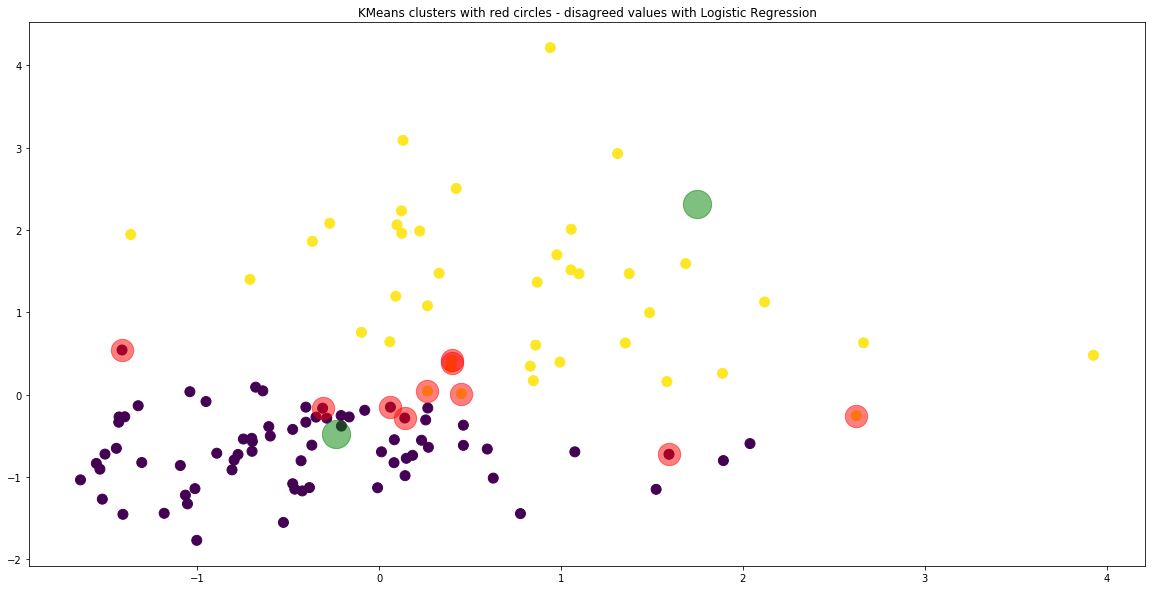

In [678]:
plt.figure(figsize=(20,10))
plt.scatter(xTest2[:, 0], xTest2[:, 1], c=labels, s=100, cmap='viridis')

mask_ = labels != logreg_y_pred1
disagreed_values = xTest2[mask_]
plt.scatter(disagreed_values[:, 0], disagreed_values[:, 1], c='red', s=500, alpha=0.5, cmap='viridis')

centers = kmean1.cluster_centers
#kmean1.init_centroids(xTrain,  centers_init='random') 

plt.scatter(centers[:, 0], centers[:, 1], c='green', s=800, alpha=0.5)
plt.title('KMeans clusters with red circles - disagreed values with Logistic Regression')
plt.show()

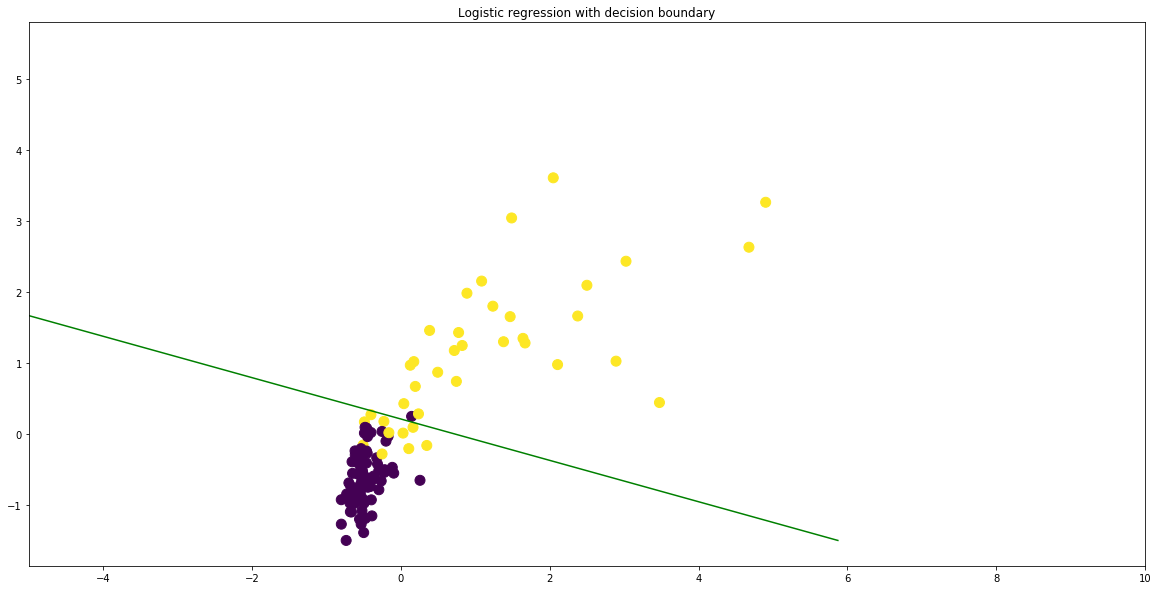

In [687]:
plt.figure(figsize=(20,10))
plt.scatter(xTest2[:, 0], xTest2[:, 1], c=logreg_y_pred2, s=100, cmap='viridis')
b0=logreg.intercept_
b1=logreg.coef_[0][0]
b2 =logreg.coef_[0][1]
y = np.array([xTest2[:, 1].min(), xTest2[:, 1].max()])

x = -(b0+b2*y)/b1
plt.plot(x,y, c='green')
plt.xlim((-5,10))
plt.title('Logistic regression with decision boundary')
plt.show()

## Compare performance of best Kmeans model with the performance of Kmeans in sklearn library, using the same hyperparameters.

In [701]:
from sklearn.metrics import accuracy_score
from scipy.stats import mode
kmean4.fit(xTrain1, centers_init='kmeans++')
pred = kmean4.predict(xTest1)

labels = np.zeros_like(pred)
for i in range(2):
    mask = (pred== i)
    labels[mask] = mode(yTest[mask])[0]
print(f'accuracy_score: ', accuracy_score(yTest, labels))

accuracy_score:  0.8421052631578947


In [695]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
pred = kmeans.fit_predict(xTest)
#kmeans.cluster_centers_.shape

labels = np.zeros_like(pred)
for i in range(2):
    mask = (pred== i)
    labels[mask] = mode(yTest[mask])[0]
print(f'accuracy_score: ', accuracy_score(yTest, labels))

accuracy_score:  0.8771929824561403
